# Intro

- This is a sample superstore dataset, a kind of a simulation where we can perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing the losses.

- Columns are: 
    * Ship Mode: First Class, Second Class, Standard Class and Same Day)
    * Segment: Consumer, Corporate and Home Office)
    * Country: The United States)
    * City: 531 city
    * State: 49 state 
    * Postal Code
    * Region: South, East, West and Centeral)
    * Category: Technology, Furniture and Office Supplies
    * Sub-Category: We have 17 sub-categories
    * Sales
    * Quantity: [1:14] item at each shipment
    * Discount: 80% Maximum
    * Profit

- Each row represents one shipping transaction

# Main Objective is to answer the following questions:

1. What are the weak areas we need to work on to gain more profit?
    - According to Regions, Segments  and States
2. What are the factors that affect the profit and sales?
    - Is there any relationship between Sales and discount? (is increasing the discount will affect the sales?)
3. What are the most/less profitable categories and Sub-Categories?
4. Which is preferred ship mode?
5. Which states have the highest/lowest sales?
- Finally What all business problem we could spot by exploring the data?



# Important Imports

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

# Data Loading

In [2]:
filename = "SampleSupersore.csv"
data = pd.read_csv("Data/SampleSuperstore.csv")

# Data Exploring 

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data = data.rename(columns = {"Postal Code":"Postal_Code", "Ship Mode": "Ship_Mode"})
data['Postal_Code'] = data.Postal_Code.astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal_Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(inplace = True)
data.shape

(9977, 13)

In [9]:
data.nunique()

Ship_Mode          4
Segment            3
Country            1
City             531
State             49
Postal_Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
print("Ship mode are: ",data['Ship_Mode'].unique())
print("Segments are: ",data['Segment'].unique())
print("Rgions are: ",data['Region'].unique())
print("Categories are: ",data['Category'].unique())
print("Maximum discount is: ",data['Discount'].max())

Ship mode are:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segments are:  ['Consumer' 'Corporate' 'Home Office']
Rgions are:  ['South' 'West' 'Central' 'East']
Categories are:  ['Furniture' 'Office Supplies' 'Technology']
Maximum discount is:  0.8


In [11]:
print("Sub-Categories of Furniture Category are: ",data.query("Category == 'Furniture'")['Sub-Category'].unique())
print("Sub-Categories of Office Supplies Category are: ",data.query("Category == 'Office Supplies'")['Sub-Category'].unique())
print("Sub-Categories of Technology Category are: ",data.query("Category == 'Technology'")['Sub-Category'].unique())

Sub-Categories of Furniture Category are:  ['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Sub-Categories of Office Supplies Category are:  ['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Sub-Categories of Technology Category are:  ['Phones' 'Accessories' 'Machines' 'Copiers']


# 1. What are the weak areas we need to work on to gain more profit?

## a. Regions and Segments

In [12]:
data.groupby(by=["Region"]).Profit.sum().sort_values()

Region
Central     39655.8752
South       46749.4303
East        91506.3092
West       108329.8079
Name: Profit, dtype: float64

- The highest profitable region is West region while the central is the least one

In [13]:
data.groupby(by=["Region","Segment"]).Profit.sum()

Region   Segment    
Central  Consumer        8512.7670
         Corporate      18704.6958
         Home Office    12438.4124
East     Consumer       41167.8979
         Corporate      23622.5789
         Home Office    26715.8324
South    Consumer       26913.5728
         Corporate      15215.2232
         Home Office     4620.6343
West     Consumer       57413.2036
         Corporate      34412.4819
         Home Office    16504.1224
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Region,Segment'>

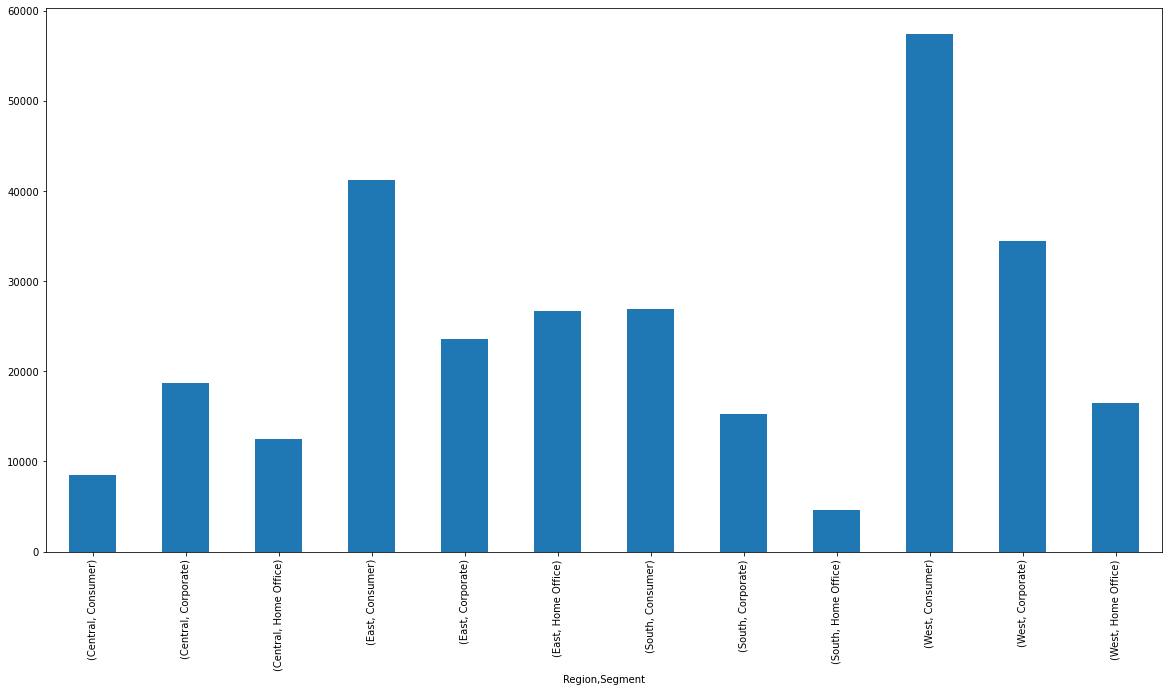

In [14]:
data.groupby(by=["Region","Segment"]).Profit.sum().plot(figsize=(20,10),kind= 'bar')

* All regions and segment are profitable 
* Most profitable segment is the consumer in west region and lowest is the Home Office in south region 
* Consumer semgment is the most profitable between all segments 

## b. States

In [15]:
# States with negative values

States_negative_profits = data.groupby(by=["State"]).Profit.sum().sort_values()
States_negative_profits.where(States_negative_profits < 0).dropna()

State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64

In [16]:
len(States_negative_profits.where(States_negative_profits < 0).dropna())/len(States_negative_profits)

0.20408163265306123

<AxesSubplot:xlabel='State'>

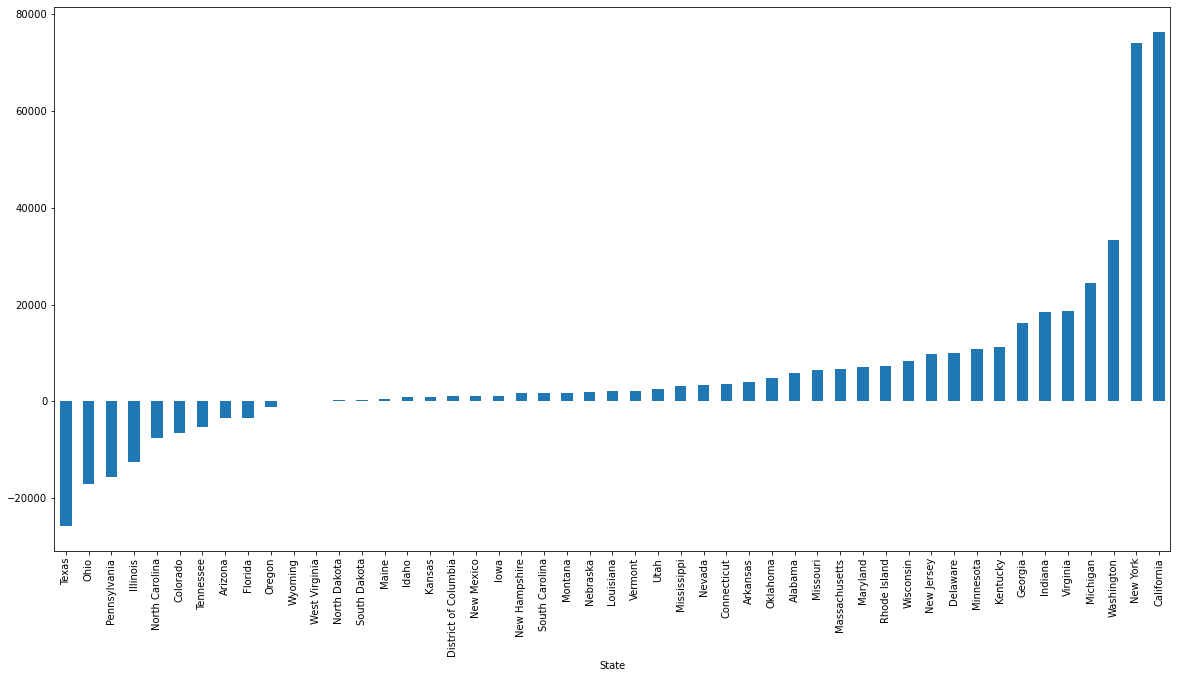

In [17]:
data.groupby(by=["State"]).Profit.sum().sort_values().plot(figsize=(20,10),kind='bar')

* The most profitable states are: California and New York 
* The less profitable are: Texas, Ohio, Pennsylvania, Illinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon
* Those states are 20% of all states 

# 2. What are the factors that affect on profit and sales?

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap ='coolwarm')\
    .set_properties(**{'font-size': '25px'})

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


* we can see that Profit has moderate positive correlation with Sales and small negative correlation with Discount 
* There's very weak relationship between sales and discount, This means if there's disount it doesn't mean sales increase.

# What are the most/less profitable categories and Sub-Categories?

<AxesSubplot:xlabel='Category', ylabel='Profit'>

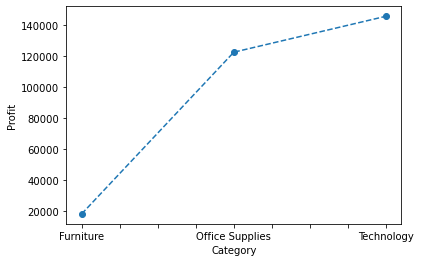

In [19]:
data.groupby(by=["Category"]).Profit.sum().plot(kind='line',y='Profit',linestyle='dashed', marker='o', ylabel='Profit')

<AxesSubplot:ylabel='Profit'>

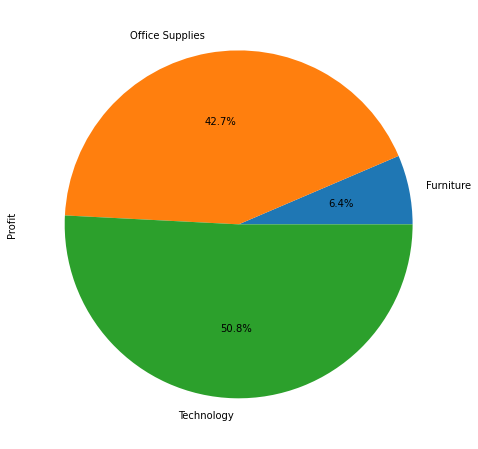

In [20]:
data.groupby(by=["Category"]).Profit.sum().plot(kind='pie',autopct='%1.1f%%', figsize=(10,8))

- Last two figures shows us the percentages of each category Vs. the profits they make.
- It shows us that Technology category is making more than half of total profits.
- Most profitable category is Technology and less is Furniture
- This means that the more orders/shipment doesn't necessarily mean more profit.

#### Let's dive more into each category

In [21]:
Technology_category = data.query("Category == 'Technology'")
OfficeSupplies_category = data.query("Category == 'Office Supplies'")
Furniture_category = data.query("Category == 'Furniture'")

<AxesSubplot:ylabel='Profit'>

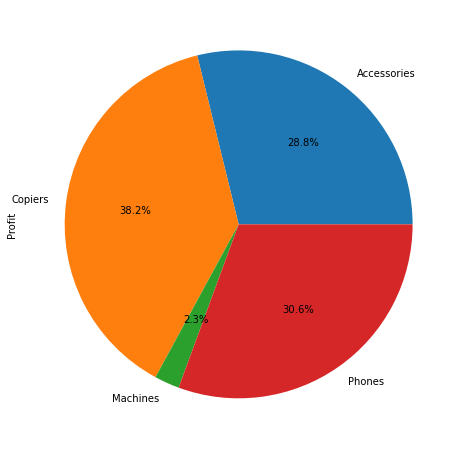

In [22]:
Technology_category.groupby(by=["Sub-Category"]).Profit.sum().plot(kind='pie',autopct='%1.1f%%', figsize=(10,8))

<AxesSubplot:xlabel='Sub-Category'>

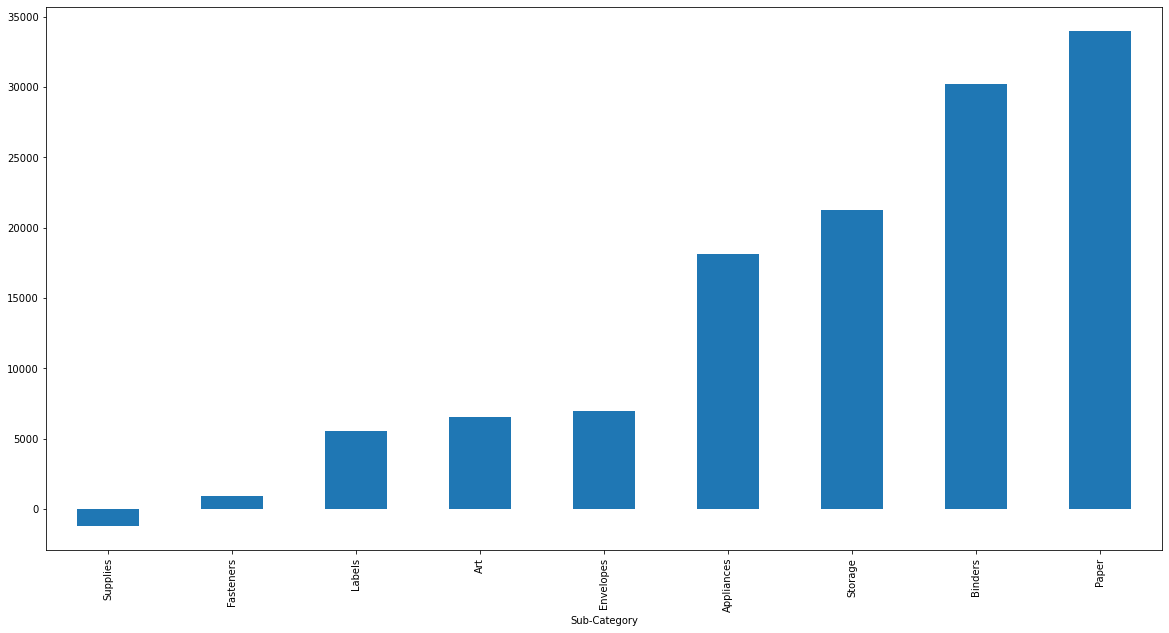

In [23]:
#using bar chart here because of the negative values
OfficeSupplies_category.groupby(by=["Sub-Category"]).Profit.sum().sort_values().plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='Sub-Category'>

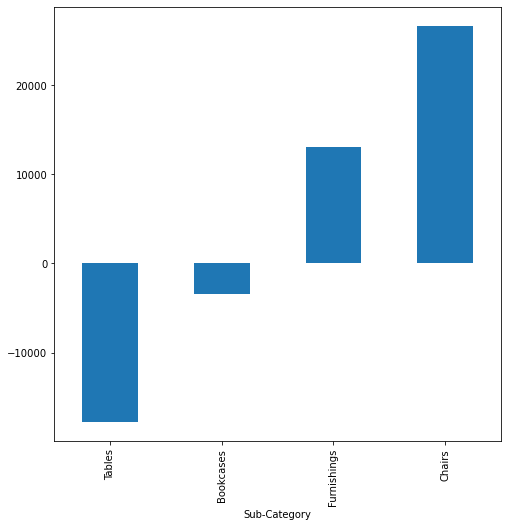

In [24]:
Furniture_category.groupby(by=["Sub-Category"]).Profit.sum().sort_values().plot(kind='bar', figsize=(8,8)) 

In [25]:
Furniture_category.groupby(by=["Sub-Category"]).Profit.sum().sort_values()

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Furnishings    13052.7230
Chairs         26567.1278
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Profit'>

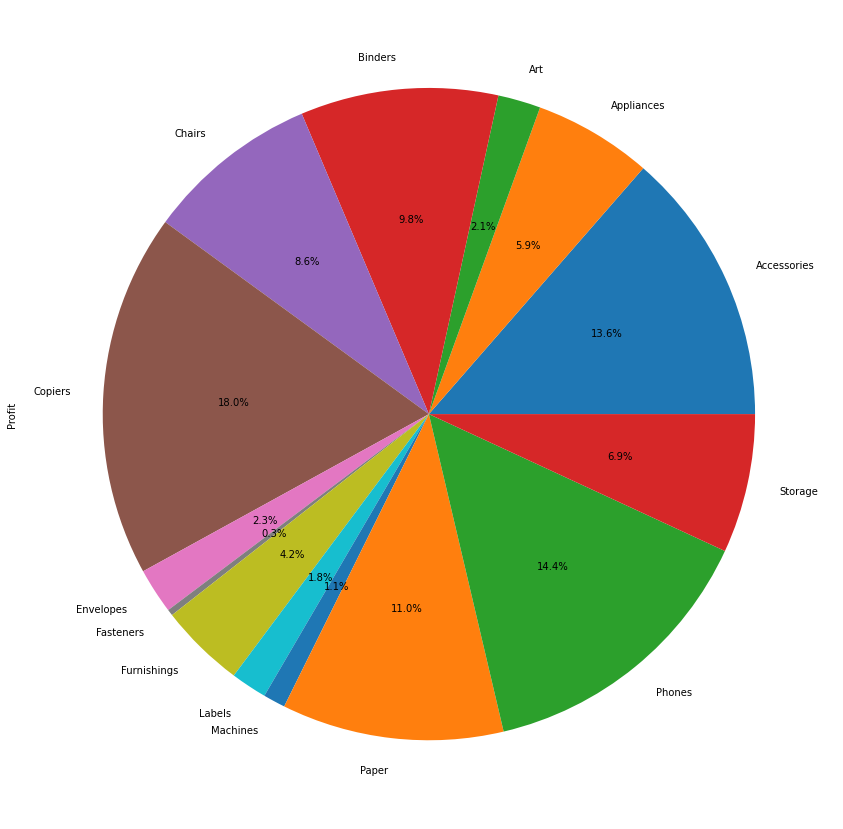

In [26]:
profit_for_subcategory = data.groupby(by=["Sub-Category"]).Profit.sum()
profit_for_subcategory.where(profit_for_subcategory >= 0).dropna().plot(kind='pie', autopct='%1.1f%%', figsize=(20,15))

- As we see the most profitable sub-categories are: Copiers, Phones and Accessories (belong to Technology category)
- The least profitable categories: Tables, Bookcases and Supplies. All have negative profit values

# 4. Which is preferred ship mode?

<AxesSubplot:xlabel='Ship_Mode'>

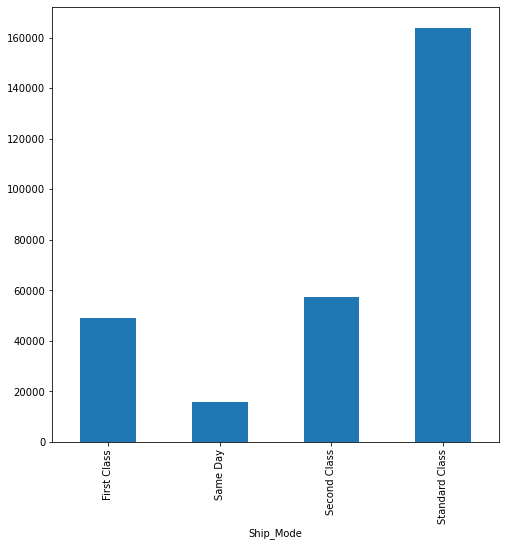

In [27]:
data.groupby(by='Ship_Mode').Profit.sum().plot(kind='bar', figsize = (8,8))

- Standard class is the most preferred/common. The other modes could be costly.

# Conclusion

- We need to work better on
    * Consumer segment on Central region and Home Office on South region
    * The following cities list (negative profits): Texas, Ohio, Pennsylvania, Illinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon
- Most profitable category is Technology, and its sub-categories are the best too (Copiers, Phones and Accessories)
- Furniture category has weak profits. And has two sub-categories are making big losses (Tables and bookcases)